In [296]:
#https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
#cool code for a button to hide code 
from IPython.display import HTML

HTML('''


<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

#### Look at probabilities of winning the Lotto 

I wanted to use a few basic distributions to look at the odds of winning the lottery. 
We will find out 2 things doing this.

<ul>
    <li> Odds over time/plays of winning the lottery </li>
    <li> Comparison of efficiency using the Binomial distribution for calculating these odds vs using the Poisson distribution </li>
    <li> Asking a bigger question of years until a higher win probability, and some ways around this big calculation </li>
</ul>

I've just done some basic research into local numbers, for 'PowerBall' in Australia. Not caring/including about power numbers or rewards such as this.

Calculation will be based off 35 available numbers (1-35), and 7 choices are available. Orden does not matter.


In [281]:
import pandas as pd
import math
#from scipy.stats import binom
import time
import numpy as np
import matplotlib.pyplot as plt
#total possibly numbers 1-35
n = 35
#player chosen numbers
k = 7


To begin we can just use some basic calculation of permutations to get an idea of the likelyhood of the amount of variations of 7 number combinations that are possible (in lotto numbers will win without regarding their order, so we factor this in with the permutations formula.

In [283]:
#possible combinations of n choose k (Order does not matter in lottery)
comb = math.factorial(n)/math.factorial(n-k)
print('Number of possible combinations when picking 7 numbers form 35: {}'.format(comb))


Number of possible combinations when picking 7 numbers form 35: 33891580800.0


So above we see that there are 33891580800.0 possible combinations, and therefor if we picked 7 numbers, then the probability that someone elese could randomly pick those numbers from 1-35 again (As is done in the lotto draws on tv), would be 1 / 33891580800.0. As calculated below

In [285]:
#probability of picking an exact k set from 1 trial
pr = 1/comb
print('Probability of picking the same combination: {}'.format(pr))

Probability of picking the same combination: 2.9505852969832555e-11


I won't go into the distributions too greatly, but the binomial basically works via calculating the probability of observing x successes, given n trials, and given the probability of a success. So for us that is the probability of 1 win, given 1 go, given the probability we mentioned before.

The poisson distribution instead generally predicts the predicted arrival of an event given a time and probability. In this case, the probability of the arrival of 1 win over the period of 1 attempt, given our earlier proabbility. 

The possion is important in the long run, because it approximates the Binomial caluclation very well when n is large, and the probability is low. Which in this case it is a very low probability, and if we have more attempts then the poisson will give a better representation.

In [286]:
#Binomial distribution - probability of observing x success in n trials
def Binom(n, x, pr):
    comb = math.factorial(n)/math.factorial(n-x)
    return comb*(pr**x)*(1-pr)**(n-x)

In [82]:
#Given arrival rate of mu what is the probability of x arrivals
# OR in terms of our example, given an expected probability of picking our correct numbers
# what is the probability of x successes\
# lambda = time*rate
def Poisson(lambd, k):
    return (math.exp(-lambd)*(lambd**k) / math.factorial(k))

Below I have used the binomial and poission respectively to calculate the probability of 1 win from 1 try given our earlier probability of 1 / 33891580800.0.

As you can see they are close to identical.

In [83]:
#probability of observing 1 success given n trials
success_pr_binon = Binom(n = 1, x=1, pr = pr)
success_pr_binon

2.9505852969832555e-11

In [84]:
success_pr_pois = Poisson(lambd=pr, k=1)
success_pr_pois

2.950585296896196e-11

We will take this a step further and imagine that we play 50 games a year over 50 years, that is we have 2500 attempts.

I will also time the different distributions to see how they handle a slightly bigger calculation.

In [85]:
# Now let's calculate if we played 50 times a yr for 50 years, i.e. 2500
# for each of the calculation methods
# we will also start timing to compare the speed of the 2 methods
n = 2500
start = time.time()
binom_pr_2500 = Binom(n, 1, pr)
end = time.time()
print('Using binomial')
print('Probability of winning lottery with 50/yr over 50 years: {}'.format(binom_pr_2500))
print('Calc speed: {}s'.format(end-start))


Using binomial
Probability of winning lottery with 50/yr over 50 years: 7.376462698553907e-08
Calc speed: 0.0019948482513427734s


In [89]:
start = time.time()
lambd = pr*n
#probability of 1 arrival given some rate over some t
poisson_pr_2500 = Poisson(lambd, 1)
end = time.time()
print('Using poisson')
print('Probability of winning lottery with 50/yr over 50 years: {}'.format(poisson_pr_2500))
print('Calc speed: {}s'.format(float(end-start), '.10f'))

Using poisson
Probability of winning lottery with 50/yr over 50 years: 7.376462698336059e-08
Calc speed: 0.0009975433349609375s


We see that the probability is still extremely low after all that playing! And secondly we see that the poisson was a bit quicker this time by a few decimal points, still negligible in this scenario though.

So next we want to know about playing even more games to look at our odds, and also about the difference in speeds for even bigger calculations.

So I will create some extra functions to perform these calculations over a series of play numbers.

In [91]:
#now let's run a really long series of each over time and calc probability
def run_prob_test_pois(pr, time_range, x):
    new_l = list()
    for t in time_range:
        lambd = pr*t
        poisson_pr = Poisson(lambd, x)
        new_l.append((poisson_pr, t))
    return new_l

def run_prob_test_binom(pr, time_range, x):
    new_l = list()
    for t in time_range:
        binom_pr = Binom(t, x, pr)
        new_l.append((binom_pr, t))
    return new_l


So below we will build up from 2500 plays to 1,000,000 plays. I will create 20 points ranging between these to test. We can see these printed below.

In [92]:
#setup spaced range for testing
plays_arr = np.linspace(1000, 10**6, 20)
plays_arr = plays_arr.astype(int)
plays_arr

array([   1000,   53578,  106157,  158736,  211315,  263894,  316473,
        369052,  421631,  474210,  526789,  579368,  631947,  684526,
        737105,  789684,  842263,  894842,  947421, 1000000])

We can see the speed results calculated below:

In [54]:
print('Using poisson')
start = time.time()
probsl_pois = run_prob_test_pois(pr, plays_arr, 1)
end = time.time()
print('Calc speed: {}s'.format(end-start))

Using poisson
Calc speed: 0.008123159408569336s


In [58]:
print('Using Binomial')
start = time.time()
probsl_bin = run_prob_test_binom(pr, plays_arr, 1)
end = time.time()
print('Calc speed: {}s'.format(end-start))

Using Binomial
Calc speed: 251.47837114334106s


Now we really see a massive difference between them, the Poisson calculated this in lightning speed, while I had to wait over 4 minutes for the Binomial to calculate! This is where we see the reality of the use between these 2 formulae in anything calculations that become significantly large.

To make sure the Poisson is approximating accurately, I will calculate it's error (compared to the results of the binomial) quickly below, and it is very small. So we are confident in it's result. 

In [287]:
errorl = list()
ml = list()
for i in range(0, len(probsl_pois)):
    #sqrd error
    ml.append(probsl_pois[i][0])
    errorl.append((probsl_pois[i][0] - probsl_bin[i][0])**2)
    
sum_sq_error = sum(errorl)
print('Error between 2 sets of probabilities {}'.format(sum_sq_error))
print('Maximum probability after all tries: {}'.format(max(ml)))

Error between 2 sets of probabilities 8.536323158990811e-30
Maximum probability after all tries: 2.950498238731678e-05


Next I will plot the proababilities of 1 win against the amount of plays:

In [76]:
time_p = [i[1] for i in probsl_pois]
pr_p = [i[0] for i in probsl_pois]
df_p = pd.DataFrame({'time':time_p, 
                      'prob': pr_p})

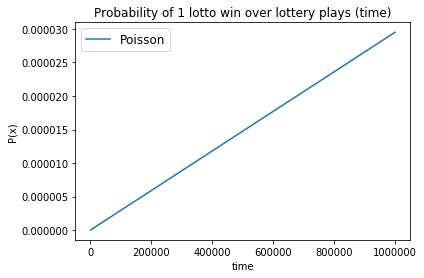

In [77]:
import seaborn as sns
sns.lineplot(x = 'time', y = 'prob',  data=df_p, label='Poisson')
plt.legend(prop={'size': 12})
plt.xlabel('time')
plt.ylabel('P(x)')
plt.title('Probability of 1 lotto win over lottery plays (time)');

So what we can is that even after playing the lottery 1 million times, we still only have a 0.000030 chance of winning 1 game. This is always a good lesson for anyone attempting to beat games of pure chance, it will always be stacked against you. 

Interestingly enough if someone paid on average 10 dollars per ticket, they would provide the lottery company with a nice 10,000,000 dollars at the end of this gambling and still only end up with 0.000030 chance of winnning :|

In a final experiment, let's see how many games we would need to play to reach a 50% chance of winning (We will find out that this isn't possible with this low probability and the Poisson distribution directly). And given 100 plays a year, how many years we would have to play for.

Having tried to use our usual Poisson method, I soon ran into floating point size issues, so first, to get a grasp of the right lambda values to use, I calculated the log probability still using Poisson (log to get the values much lower).

And plotting them below we see the function approach a 50% change = ln(0.5) = -1. The x-axis is in terms of the stepsize, so x1 = 100000 plays.

In [288]:
step_size = 10000
l = list()
i = step_size
log_pr_goal = -1.0
curr_log_prob = -10
while log_pr_goal > curr_log_prob:
    lambd = pr*i
    curr_log_prob = -lambd + math.log2(lambd)
    i += step_size
    l.append(curr_log_prob)


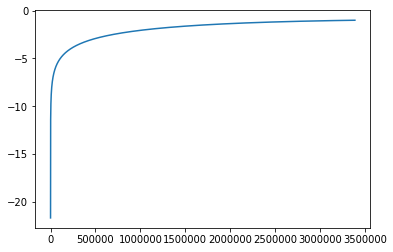

In [289]:
s = pd.Series(l)
s.plot.line()

In [290]:
l[len(l)-4:len(l)]

[-1.0000002716918432,
 -1.000000141070697,
 -1.0000000104496762,
 -0.9999998798287811]

In [291]:
math.exp(l[len(l)-2])

0.3678794373272213

Looking through the values, I find that at these values of ln(P(x)) we can't even get the precision to get a 50% probability of winning a game, but instead getting our (n-1)th value and reconverting it to probability, we get the 0.367 probability of winning a game.

In [293]:
print('Plays to each probability for 1 win = {} were: {} plays'.format(math.exp(l[len(l)-2]),i))
print('Playing 100 times/yr this would take {} years'.format(i/100))
print('If paying $10/play, this would cost: ${} (~338 billion dollars)'.format(i*10))


Plays to each probability for 1 win = 0.3678794373272213 were: 33891600000 plays
Playing 100 times/yr this would take 338916000.0 years
If paying $10/play, this would cost: $338916000000 (~338 billion dollars)


If we want we can use this new rate in Poisson to get a more precise estimate.

In [294]:
res = Poisson(pr*i, 1)
res


0.36787944117138327

Interestingly enough i = number of possible combnations for 7 nums, that is the number of possible combinations for the 7 we chose. This makes sense, if our probability of winning a game is 1/n, then if we play n times, our required trials is reached and we would have expected to win, however because of the behaviour of the Poisson function we don't reach this.

Interestingly also, this value is a property of the poission distribution. That if you have some probability 1/n, and you run that trial n times. Your probability approaches 1/e = 0.367... And we can't actually get further from this value, because as soon as we increase our trial numbers, we are approaching a probability that is moving away from 1 event but now towards success for 2 events. 

Changing the value for x in the Poisson params we can see how our odds look now for 2 events.

In [295]:
res = Poisson(pr*i, 2)
res

0.18393982478981996

I'm unsure why the Poisson distribution acts this way. This would take soem further research and intuition of this problem.

But anyway we discovered what we set out to do, looking at these distributions and also our likelihood of winning a lottery game. Not very high!












